In [11]:
from manim import *
from numpy import linalg as npl
import matplotlib.pyplot as plt
import jupyter_capture_output
from scipy.interpolate import make_interp_spline, BSpline

video_scene = " -v WARNING --progress_bar None --disable_caching li_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s li_Scene"

In [295]:
def F1(r):
    r = r / 2
    x = np.sin(r[1])
    y = np.cos(r[0]) + r[1] / 4
    return x * RIGHT + y * UP


def traj1(t):
    x = t / 1.5 - 2 * np.sin(t) 
    y = -t / 5
    return np.array([x, y, 0])

t0 = -3.5
t1 = 3.5

In [335]:
%%capture_video --path "animations/line_integration/line_integration.mp4"
%%manim -ql --fps 20 $video_scene

class li_Scene(Scene):
    def construct(self):
        F_eq = MathTex(r'F(x, y)=', font_size = 36, color = BLUE).align_on_border(LEFT).align_on_border(RIGHT, buff = 3.5).shift(1.5*UP)
        F_vec = Matrix([[r'\mathrm{sin}(y)'], [r'\mathrm{cos}(x)+y/4']]).scale(0.75).next_to(F_eq, RIGHT).set_color(BLUE)
        F = VGroup(F_eq, F_vec)

        gamma_eq = MathTex(r'\gamma(t)=', font_size = 36).next_to(F_eq, 6*DOWN)
        gamma_vec = Matrix([[r't'], [r'\mathrm{sin}(2t)/2+t/4']]).scale(0.75).next_to(gamma_eq, RIGHT)
        gamma = VGroup(gamma_eq, gamma_vec)

        li_eq1 = MathTex(r'\int_{\gamma}F\cdot ds', font_size = 36).align_on_border(UP + LEFT, buff = 0.5)
        li_eq2 = MathTex(r'=\int_{\gamma}F(x, y)\cdot\frac{d\gamma}{dt}dt', font_size = 36).next_to(li_eq1, RIGHT)
        li_eq2_Fblue = MathTex(r'=\int_{\gamma}F(x, y)\cdot\frac{d\gamma}{dt}dt', font_size = 36).next_to(li_eq1, RIGHT)
        #li_eq2_gammablue = MathTex(r'=\int_{\gamma}F(x, y)\cdot\frac{d\gamma}{dt}dt', font_size = 36).align_on_border.next_to(li_eq1, RIGHT)
        #self.add(index_labels(li_eq2_blue[0]))
        li_eq2_Fblue[0][3:9].set_color(BLUE)
        #li_eq2_gammablue[0][2].set_color(BLUE)
        li_eq3 = MathTex(r'=\int_{t_0}^{t_1}F(\gamma(t))\cdot\dot{\gamma}(t)dt', font_size = 36).next_to(li_eq2, RIGHT)


        ax = Axes(x_range = [-4, 4, 1], y_range = [-1.5, 1.5, 1], x_length = 9, y_length = 5)
        plot = ax.plot_parametric_curve(traj1, t_range = [t0, t1], stroke_opacity = 0.5)
        t0_line = Line(start = ax.coords_to_point(traj1(t0)[0], traj1(t0)[1] - 0.125, 0), end = ax.coords_to_point(traj1(t0)[0], traj1(t0)[1] + 0.125, 0), stroke_opacity = 0.5)
        t1_line = Line(start = ax.coords_to_point(traj1(t1)[0], traj1(t1)[1] - 0.125, 0), end = ax.coords_to_point(traj1(t1)[0], traj1(t1)[1] + 0.125, 0), stroke_opacity = 0.5)
        t0_label = MathTex(r't_0', font_size = 36, stroke_width = 1).next_to(t0_line, DOWN)
        t1_label = MathTex(r't_1', font_size = 36, stroke_width = 1).next_to(t1_line, UP)
        traj = VGroup(plot, t0_line, t1_line, t0_label, t1_label)

        avf = ArrowVectorField(F1, x_range = [-16, 16, 1], y_range = [-6, 6, 1], length_func = lambda x: x/2, colors = [BLUE], opacity = 0.25, vector_config = {'stroke_width': 2}).scale(0.25)
        rect = Rectangle(width = 8.4, height = 3.5, stroke_width = 0.75)
        field = VGroup(traj, avf, rect).shift(2.5*LEFT + 0.5*UP)

        self.play(Write(li_eq1)) 
        self.play(Write(li_eq2))
        self.play(Write(F), Transform(li_eq2, li_eq2_Fblue))
        self.play(TransformFromCopy(F, avf), FadeIn(rect))
        self.play(Write(gamma), Transform(li_eq2_Fblue, li_eq2))
        self.play(TransformFromCopy(gamma, traj))
        self.play(Write(li_eq3))
        self.wait(3)
        #self.play(Transform(traj, traj_t), Transform(avf, avf_t))

In [209]:
%%capture_video --path "animations/line_integration/line_integration.mp4"
%%manim -ql --fps 20 $video_scene

# Base Animation
class li_Scene(Scene):
    def construct(self):
        self.play(Write(li_eq1)) 
        self.play(Write(li_eq2))
        self.play(Write(F), Transform(li_eq2, li_eq2_blue))
        #self.play(TransformFromCopy(F, vector_field))
        self.add(vector_field)
        self.play(Write(li_eq3), Write(gamma))
        self.play(TransformFromCopy(gamma, traj))
        self.wait(3)
        #self.add(field, li_eq1, li_eq2_blue, li_eq3, F, gamma)


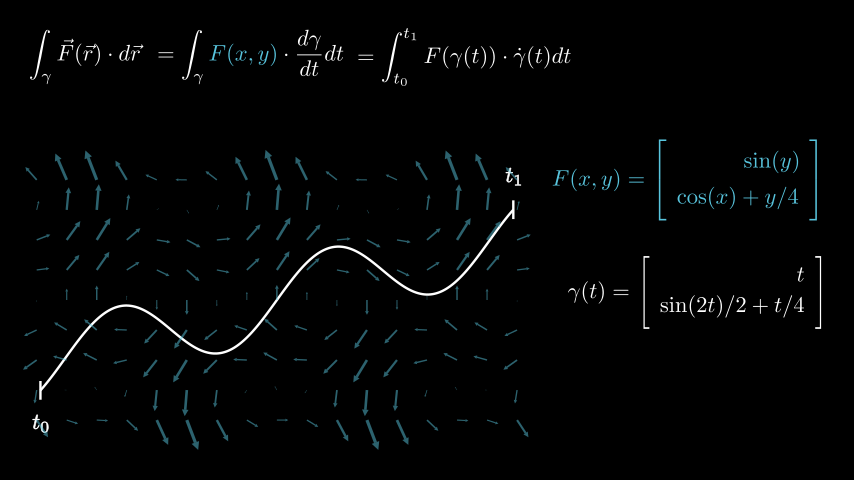

In [215]:
%%capture_video --path "animations/line_integration/line_integration.mp4"
%%manim -ql --fps 20 $video_scene

class li_Scene(Scene):
    def construct(self):
        self.add(field, li_eq1, li_eq2_blue, li_eq3, F, gamma)